# Churn Prediction in Telecom Industry using Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import time
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [83]:
df = pd.read_csv('https://raw.githubusercontent.com/JOHANDILEEP21/Churn-Prediction-in-Telecom-Industry/main/Telecom-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [84]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [85]:
df = df.drop_duplicates()

In [86]:
df.shape

(7043, 21)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [88]:
df = df.drop('customerID', axis=1)

In [89]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [90]:
le = LabelEncoder()
# df['Churn'] = le.fit_transform(df['Churn'])

In [91]:
#df.head()

In [92]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [93]:
df1 = df.copy()

In [13]:
# Encode each categorical column in the DataFrame
# encoded_data = df.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)
# encoded_data

In [14]:
#encoded_data.dtypes

In [15]:
#edf = encoded_data.astype('float')

In [16]:
#edf.info()

In [20]:
df.value_counts().unique()

array([3, 2, 1])

In [23]:
# df2 = df.iloc[:,[8,9,10,11,12,13,14]]
# df2

In [21]:
# df3 = df.iloc[:,[0,1,2,3,4,5,6,7,15,16,17,18,19]]
# df3

In [40]:
len(df.columns)

20

In [94]:
# df['Dependents'].value_counts()

In [104]:
for i in df.columns:
  print(df[i].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No            

In [106]:
df3 = df.iloc[:,[6,7,8,9,10,11,12,13,14,16]]
df3

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check
1,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check
2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check
3,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic)
4,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
...,...,...,...,...,...,...,...,...,...,...
7038,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Mailed check
7039,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Credit card (automatic)
7040,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Electronic check
7041,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Mailed check


In [107]:
df3 = pd.get_dummies(df3, columns=df3.columns)
df3

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0,0,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
7039,0,0,1,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
7040,0,1,0,1,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0
7041,0,0,1,0,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [108]:
print(df3.columns)

Index(['MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


In [109]:
df.columns.value_counts().unique()

array([1])

In [110]:
# print(df3.info())

In [111]:
edf1 = pd.concat([df3, df[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','PaperlessBilling','MonthlyCharges','TotalCharges','Churn']]], axis=1)
edf1

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,1,0,0,0,...,Female,0,Yes,No,1,No,Yes,29.85,29.85,No
1,1,0,0,1,0,0,0,0,1,1,...,Male,0,No,No,34,Yes,No,56.95,1889.5,No
2,1,0,0,1,0,0,0,0,1,0,...,Male,0,No,No,2,Yes,Yes,53.85,108.15,Yes
3,0,1,0,1,0,0,0,0,1,1,...,Male,0,No,No,45,No,No,42.30,1840.75,No
4,1,0,0,0,1,0,1,0,0,1,...,Female,0,No,No,2,Yes,Yes,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0,0,0,0,1,1,...,Male,0,Yes,Yes,24,Yes,Yes,84.80,1990.5,No
7039,0,0,1,0,1,0,1,0,0,0,...,Female,0,Yes,Yes,72,Yes,Yes,103.20,7362.9,No
7040,0,1,0,1,0,0,0,0,1,1,...,Female,0,Yes,Yes,11,No,Yes,29.60,346.45,No
7041,0,0,1,0,1,0,1,0,0,1,...,Male,1,Yes,No,4,Yes,Yes,74.40,306.6,Yes


In [112]:
edf1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MultipleLines_No                         7043 non-null   uint8  
 1   MultipleLines_No phone service           7043 non-null   uint8  
 2   MultipleLines_Yes                        7043 non-null   uint8  
 3   InternetService_DSL                      7043 non-null   uint8  
 4   InternetService_Fiber optic              7043 non-null   uint8  
 5   InternetService_No                       7043 non-null   uint8  
 6   OnlineSecurity_No                        7043 non-null   uint8  
 7   OnlineSecurity_No internet service       7043 non-null   uint8  
 8   OnlineSecurity_Yes                       7043 non-null   uint8  
 9   OnlineBackup_No                          7043 non-null   uint8  
 10  OnlineBackup_No internet service         7043 no

In [113]:
encoded_data = edf1.apply(lambda x: le.fit_transform(x) if x.dtype == 'object' else x)
encoded_data

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,1,29.85,2505,0
1,1,0,0,1,0,0,0,0,1,1,...,1,0,0,0,34,1,0,56.95,1466,0
2,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,2,1,1,53.85,157,1
3,0,1,0,1,0,0,0,0,1,1,...,1,0,0,0,45,0,0,42.30,1400,0
4,1,0,0,0,1,0,1,0,0,1,...,0,0,0,0,2,1,1,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0,0,0,0,1,1,...,1,0,1,1,24,1,1,84.80,1597,0
7039,0,0,1,0,1,0,1,0,0,0,...,0,0,1,1,72,1,1,103.20,5698,0
7040,0,1,0,1,0,0,0,0,1,1,...,0,0,1,1,11,0,1,29.60,2994,0
7041,0,0,1,0,1,0,1,0,0,1,...,1,1,1,0,4,1,1,74.40,2660,1


In [114]:
edf = encoded_data.astype('float')
edf

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,...,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,29.85,2505.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,34.0,1.0,0.0,56.95,1466.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,2.0,1.0,1.0,53.85,157.0,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,45.0,0.0,0.0,42.30,1400.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,2.0,1.0,1.0,70.70,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,24.0,1.0,1.0,84.80,1597.0,0.0
7039,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,72.0,1.0,1.0,103.20,5698.0,0.0
7040,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,11.0,0.0,1.0,29.60,2994.0,0.0
7041,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,4.0,1.0,1.0,74.40,2660.0,1.0


In [115]:
# df1['PaymentMethod'].unique()
# len(df1['InternetService'].unique())


In [116]:
q1 = edf.quantile(0.25)
q3 = edf.quantile(0.75)
iqr = q3-q1
edf1 = ((edf < ( q1 - 1.5 * iqr)) | ( edf > ( q3 + 1.5 * iqr))).sum()

In [117]:
edf.iloc[:,[3]].value_counts()

InternetService_DSL
0.0                    4622
1.0                    2421
dtype: int64

In [118]:
edf2 = ((edf < ( q1 - 1.5 * iqr)) | ( edf > ( q3 + 1.5 * iqr))).sum()
edf2

MultipleLines_No                              0
MultipleLines_No phone service              682
MultipleLines_Yes                             0
InternetService_DSL                           0
InternetService_Fiber optic                   0
InternetService_No                         1526
OnlineSecurity_No                             0
OnlineSecurity_No internet service         1526
OnlineSecurity_Yes                            0
OnlineBackup_No                               0
OnlineBackup_No internet service           1526
OnlineBackup_Yes                              0
DeviceProtection_No                           0
DeviceProtection_No internet service       1526
DeviceProtection_Yes                          0
TechSupport_No                                0
TechSupport_No internet service            1526
TechSupport_Yes                               0
StreamingTV_No                                0
StreamingTV_No internet service            1526
StreamingTV_Yes                         

In [119]:
edf.describe().T

,count,mean,std,min,25%,50%,75%,max
MultipleLines_No,7043.0,0.481329,0.499687,0.00,0.0,0.00,1.00,1.00
MultipleLines_No phone service,7043.0,0.096834,0.295752,0.00,0.0,0.00,0.00,1.00
MultipleLines_Yes,7043.0,0.421837,0.493888,0.00,0.0,0.00,1.00,1.00
InternetService_DSL,7043.0,0.343746,0.474991,0.00,0.0,0.00,1.00,1.00
InternetService_Fiber optic,7043.0,0.439585,0.496372,0.00,0.0,0.00,1.00,1.00
InternetService_No,7043.0,0.216669,0.412004,0.00,0.0,0.00,0.00,1.00
OnlineSecurity_No,7043.0,0.496663,0.500024,0.00,0.0,0.00,1.00,1.00
OnlineSecurity_No internet service,7043.0,0.216669,0.412004,0.00,0.0,0.00,0.00,1.00
OnlineSecurity_Yes,7043.0,0.286668,0.452237,0.00,0.0,0.00,1.00,1.00
OnlineBackup_No,7043.0,0.438450,0.496232,0.00,0.0,0.00,1.00,1.00


<Axes: >

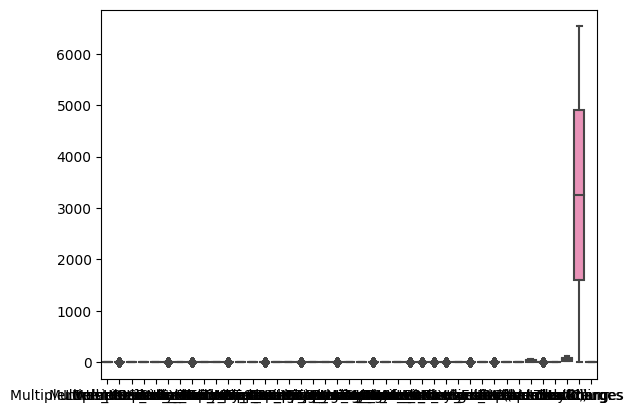

In [120]:
sns.boxplot(data= edf)

<Axes: >

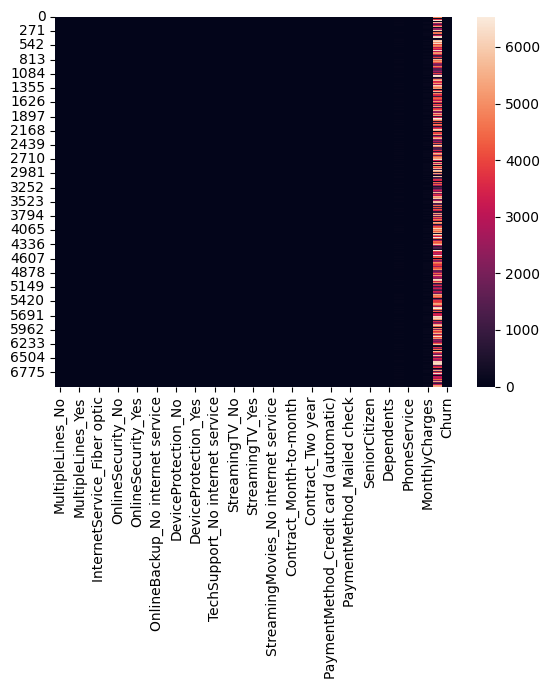

In [121]:
sns.heatmap(edf)

## EDA

In [122]:
count = edf.groupby('Churn').count().T
count

Churn,0.0,1.0
MultipleLines_No,5174,1869
MultipleLines_No phone service,5174,1869
MultipleLines_Yes,5174,1869
InternetService_DSL,5174,1869
InternetService_Fiber optic,5174,1869
InternetService_No,5174,1869
OnlineSecurity_No,5174,1869
OnlineSecurity_No internet service,5174,1869
OnlineSecurity_Yes,5174,1869
OnlineBackup_No,5174,1869


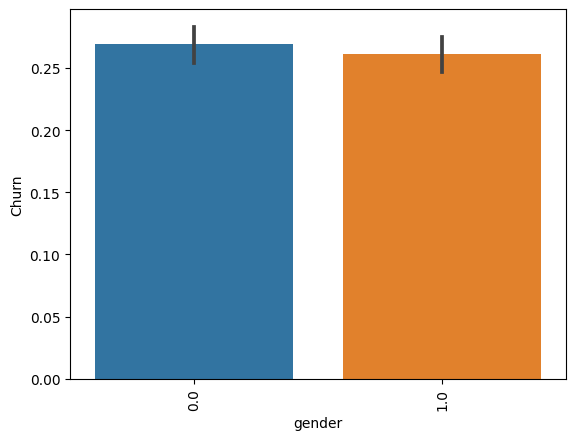

In [123]:
ax = sns.barplot(data=edf,x='gender',y='Churn')
ax.tick_params(axis='x',rotation=90)
count = edf.groupby('gender').count()
count = count.reset_index()

In [125]:
# plt.figure(figsize=(15,3))
# ax = sns.countplot(data = edf, x='SeniorCitizen')
# #ax.figure.savefig('5.1.pdf')
# plt.xticks(rotation=90)
# pc = edf.plot(kind='bar',figsize=(15,3), title='5 to see the analysis of Top Selling Product Categories')
# #plt.savefig('5.2.pdf')

<Axes: >

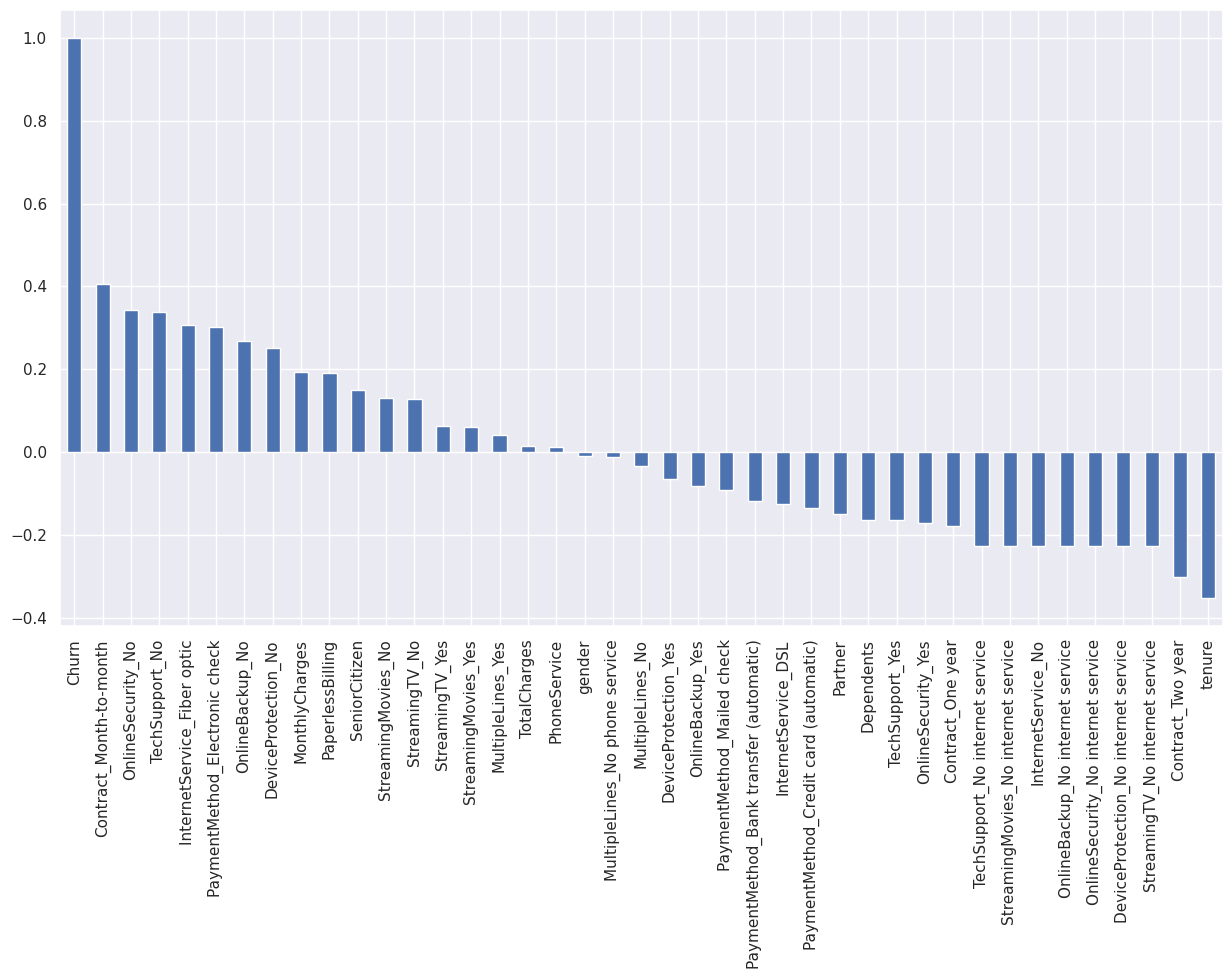

In [214]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
edf.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<Axes: >

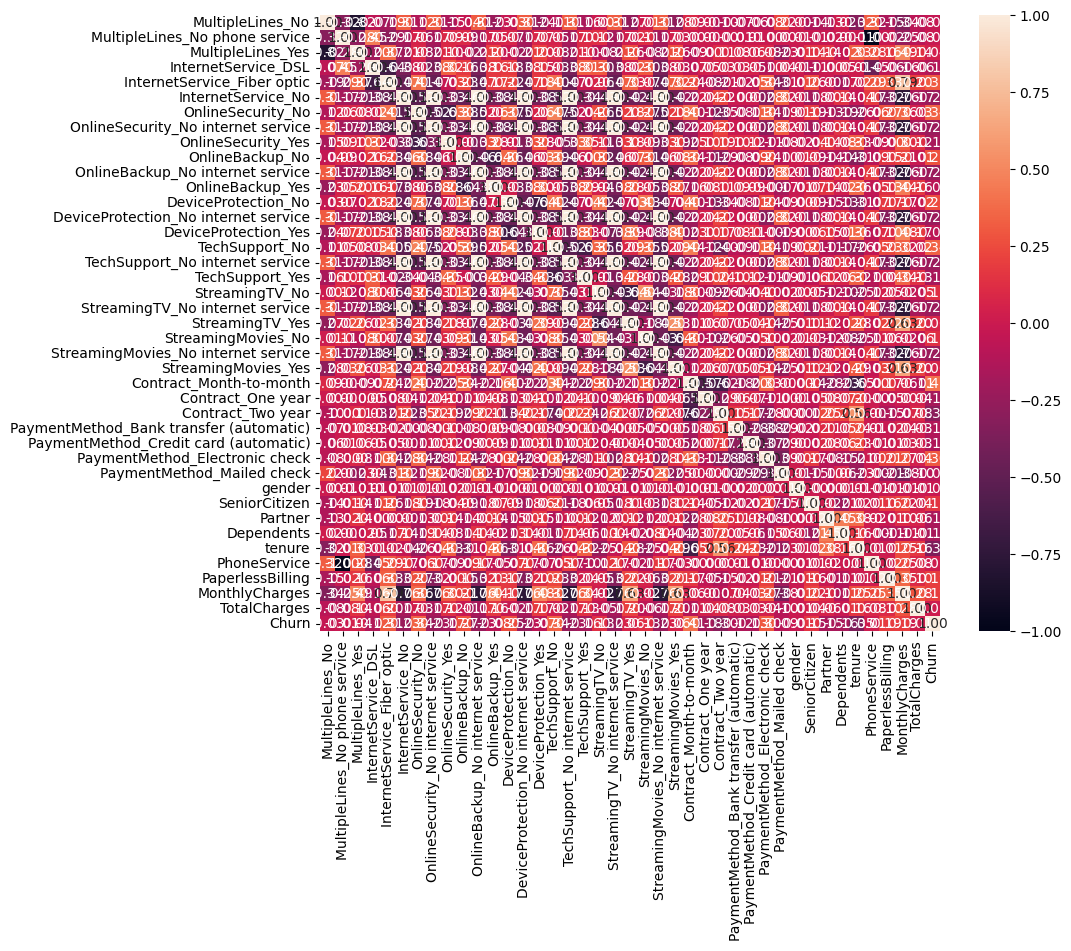

In [126]:
plt.figure(figsize=(10,8))
sns.heatmap(edf.corr(), annot=True, fmt='.2f')

### Here we can see most of the columns are not correlated each other. Only one column are correlated.

In [81]:
# tc = edf.groupby(['tenure'])['Contract'].sum().sort_values(ascending=False).to_frame()
# tc = edf.reset_index()
# sns.set(rc={"figure.figsize" :(15,3)})
# ax = sns.barplot(data=edf, x='tenure',y='Contract')
# ax.tick_params(axis='x',rotation=90)

## We'll see Bivariate Analysis

In [129]:
42-6

36

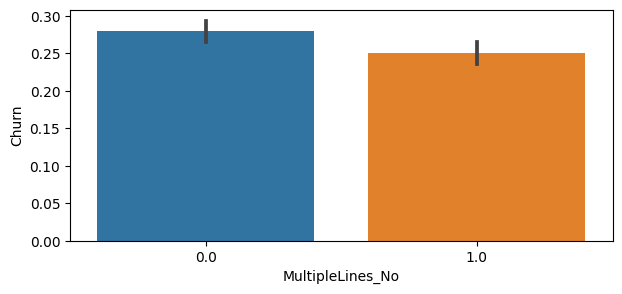

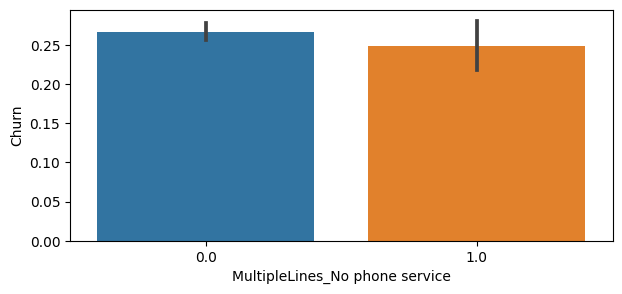

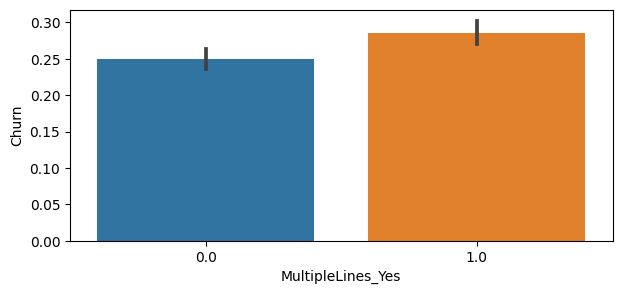

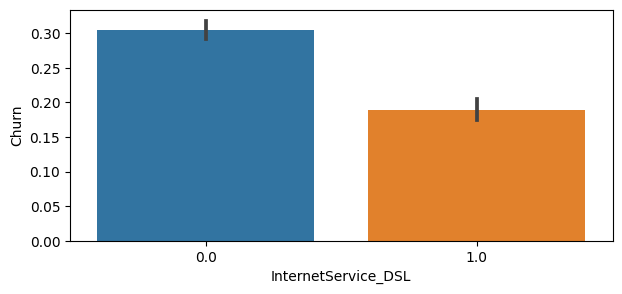

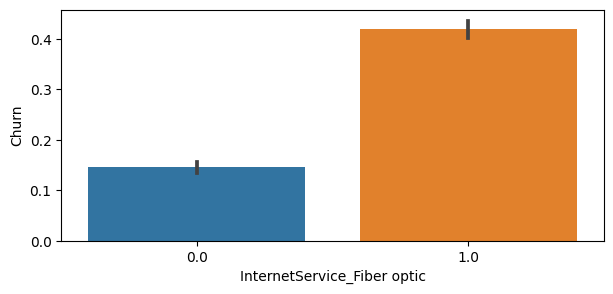

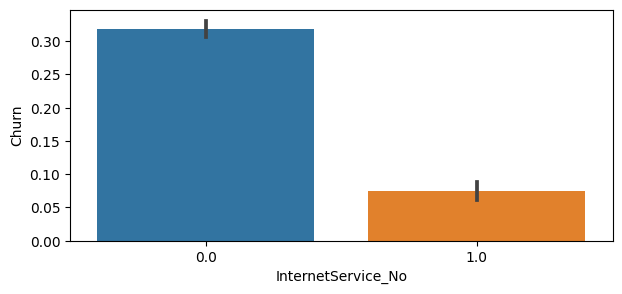

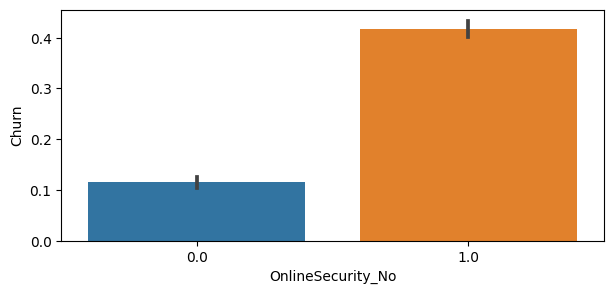

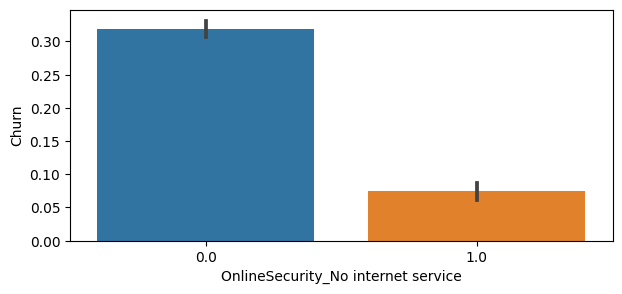

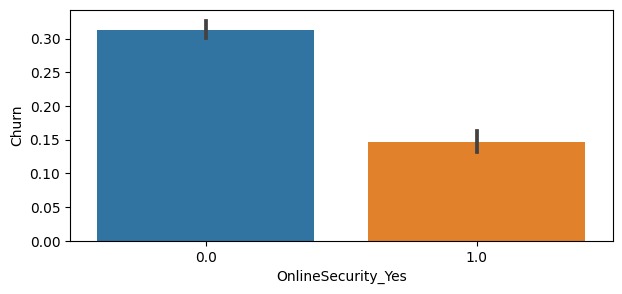

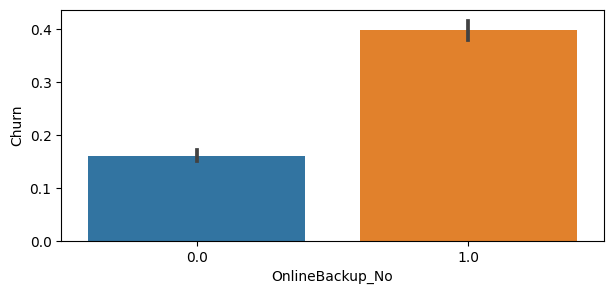

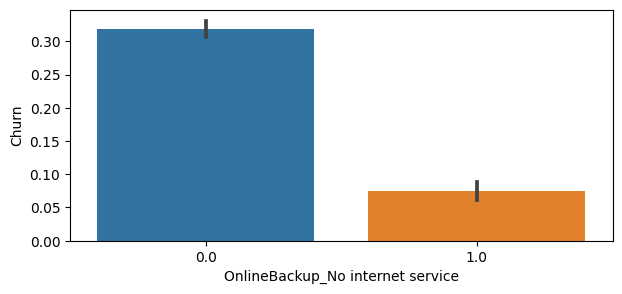

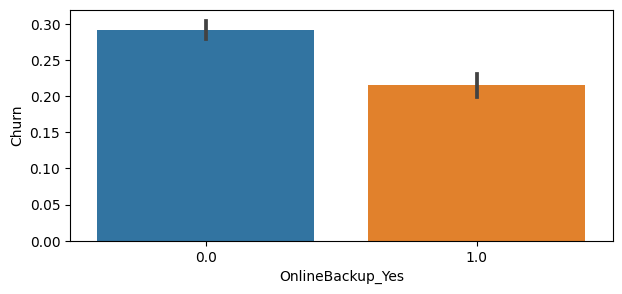

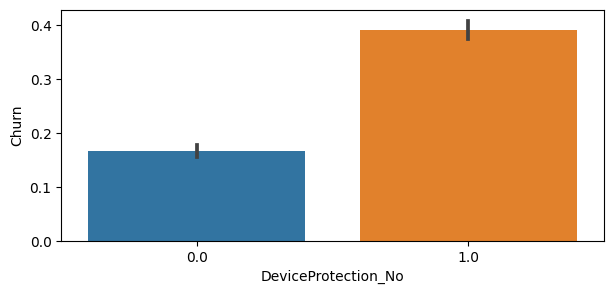

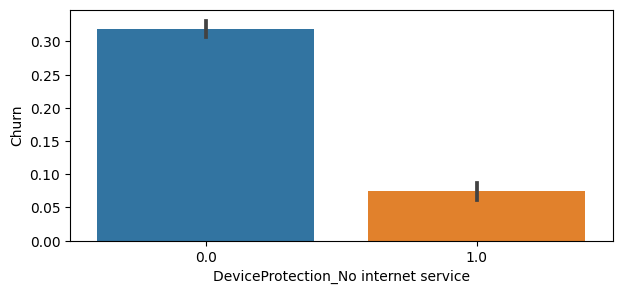

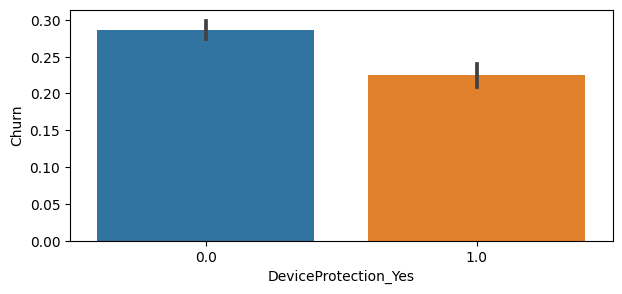

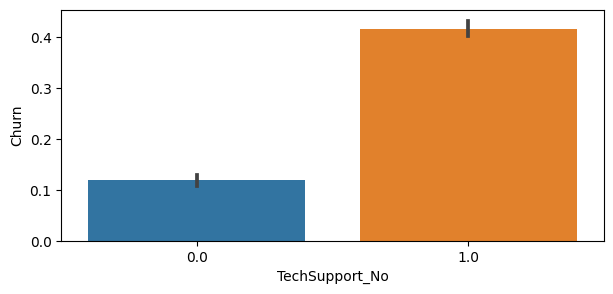

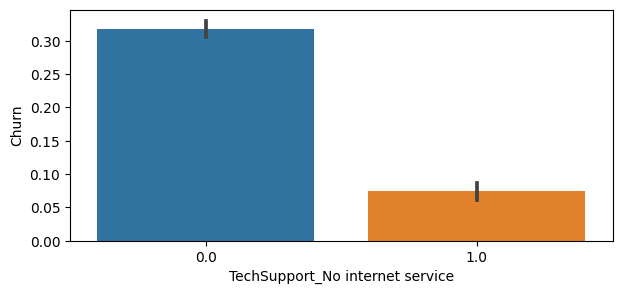

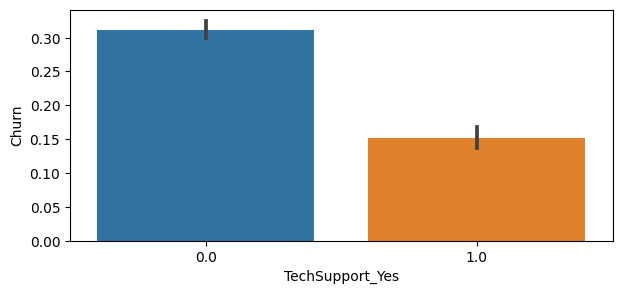

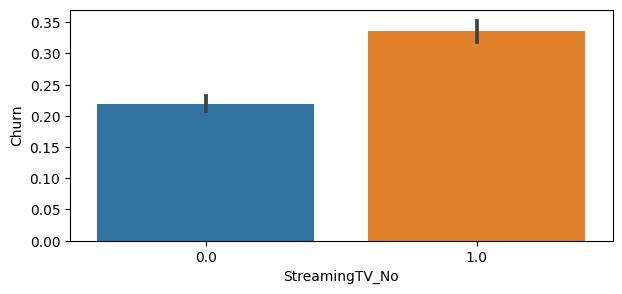

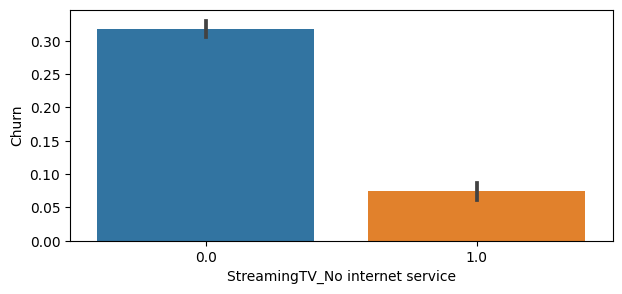

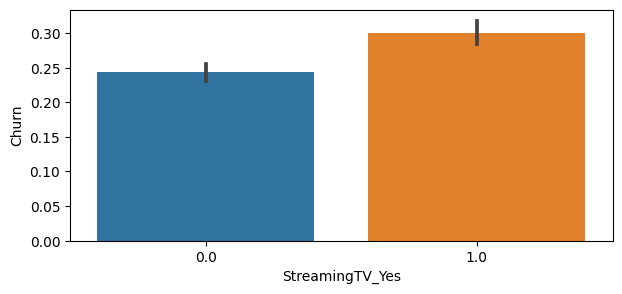

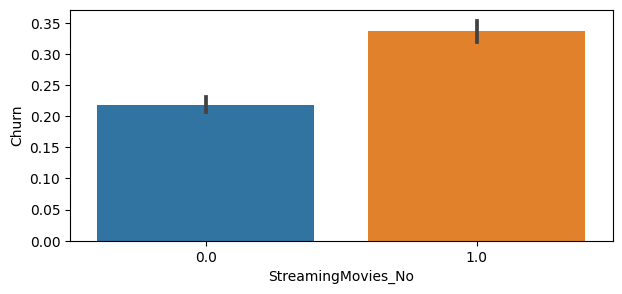

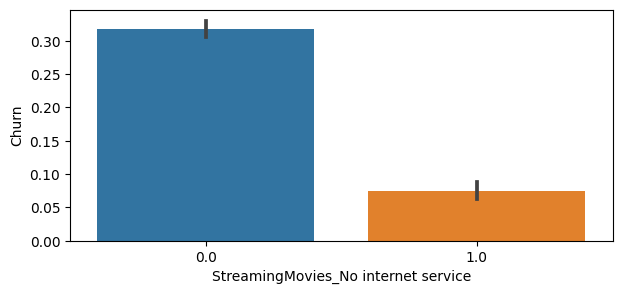

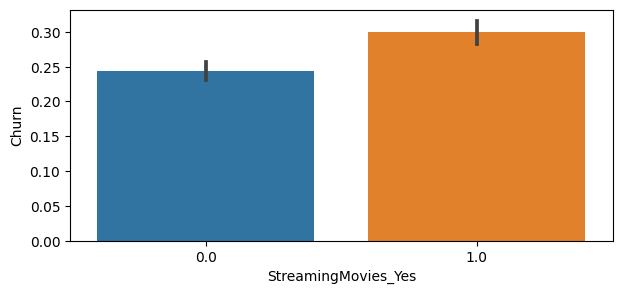

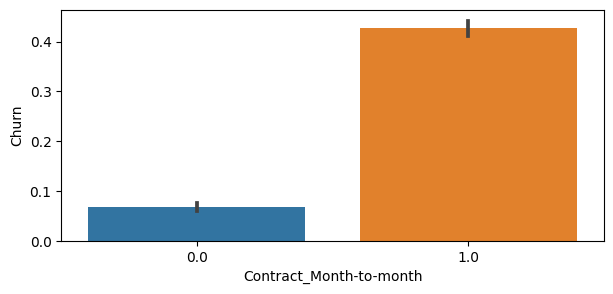

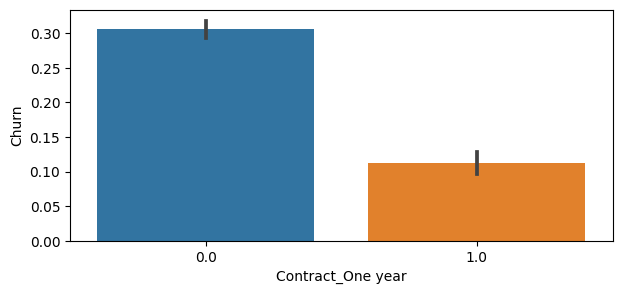

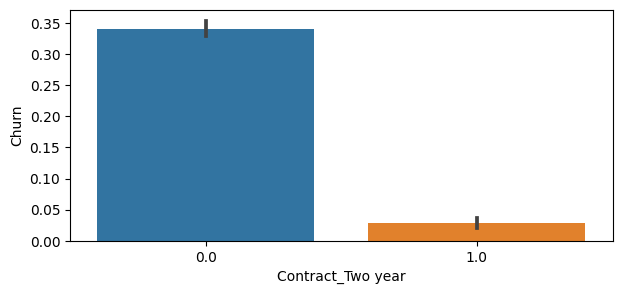

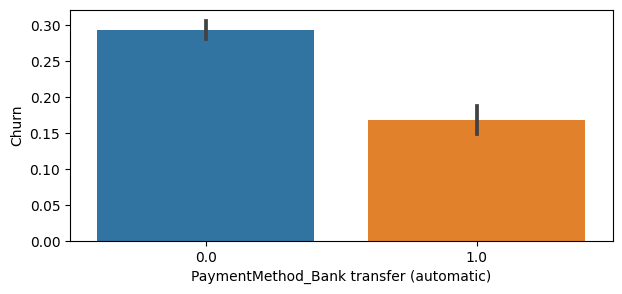

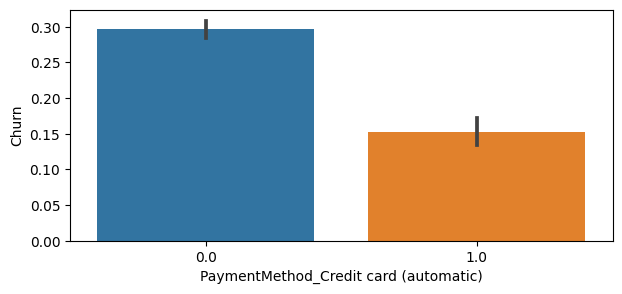

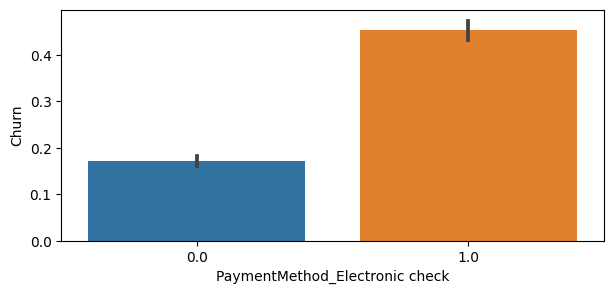

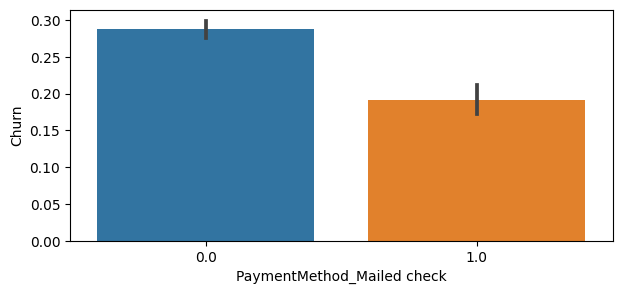

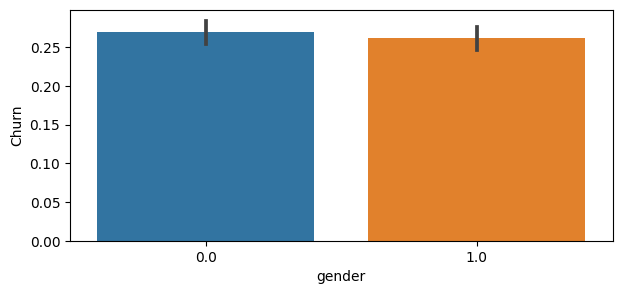

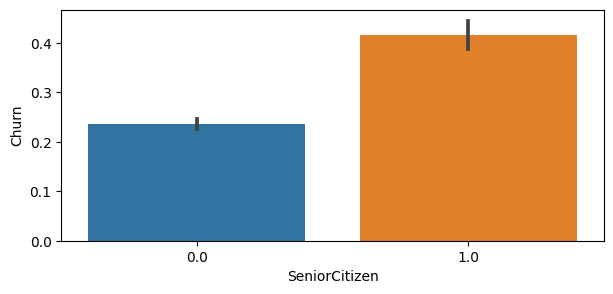

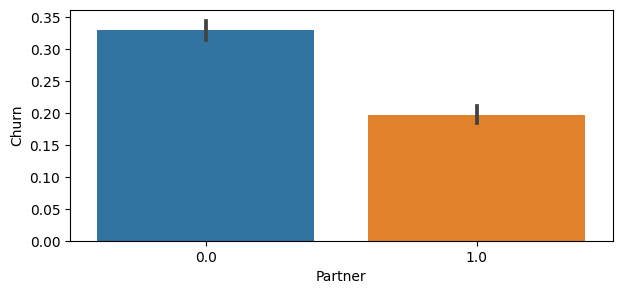

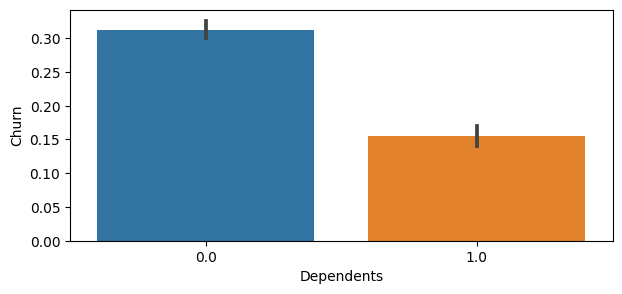

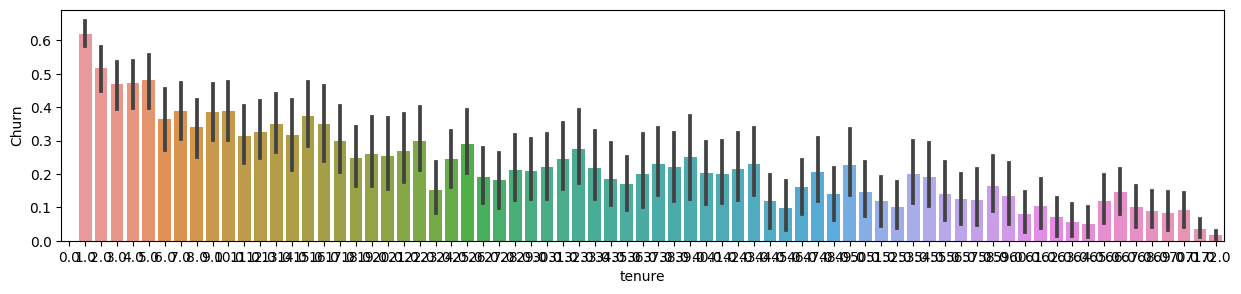

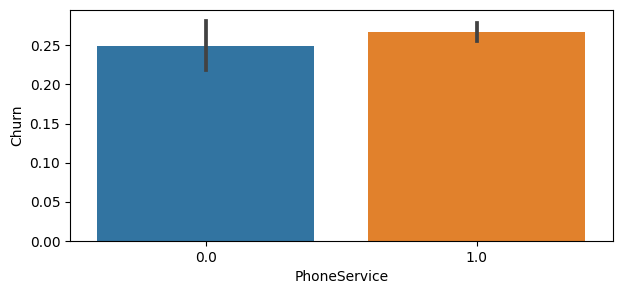

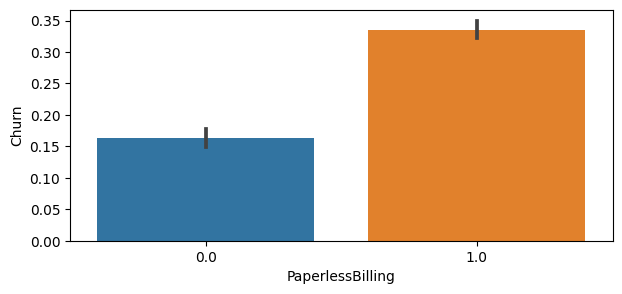

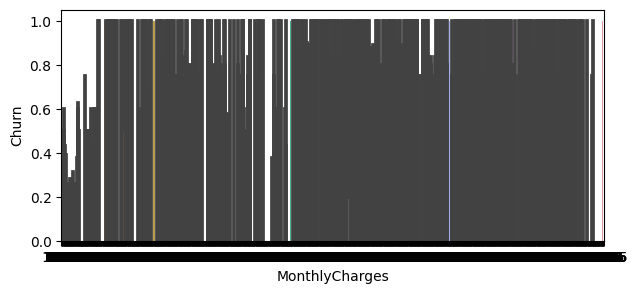

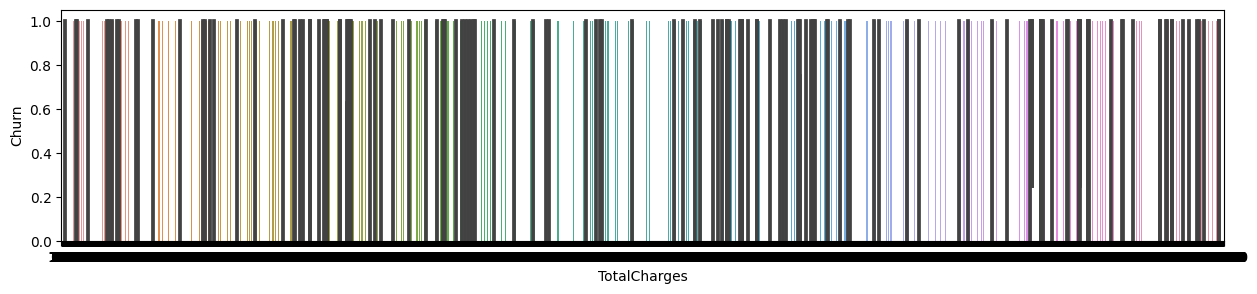

In [132]:
for i in range(len(edf.columns)-1):
  if i == 40 or i == 39 or i == 35:
    plt.figure(figsize=(15,3))
    sns.barplot(x=edf.iloc[:,i], y=edf.iloc[:,-1])
    plt.show()
  else:
    plt.figure(figsize=(7,3))
    sns.barplot(x=edf.iloc[:,i], y=edf.iloc[:,-1])
    plt.show()

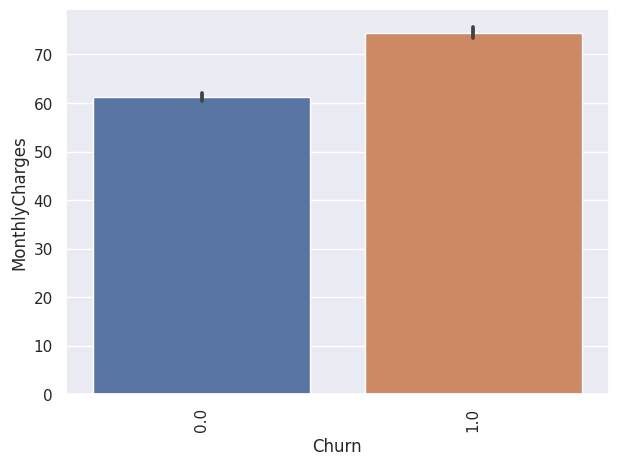

In [133]:
tc = edf.groupby(['Churn'])['MonthlyCharges'].sum().sort_values(ascending=False).to_frame()
tc = edf.reset_index()
sns.set(rc={"figure.figsize" :(7,5)})
ax = sns.barplot(data=edf, x='Churn',y='MonthlyCharges')
ax.tick_params(axis='x',rotation=90)

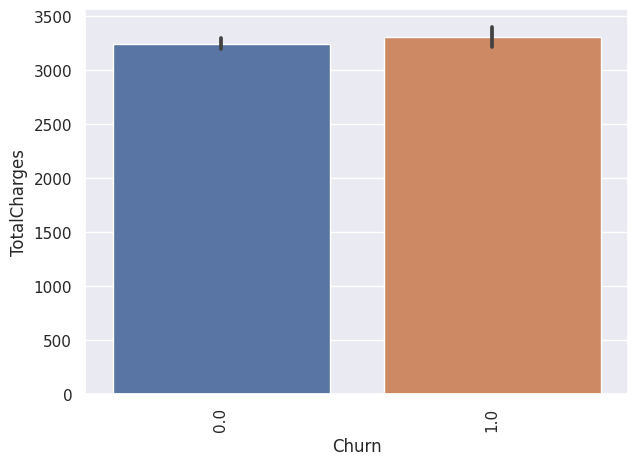

In [134]:
tc = edf.groupby(['Churn'])['TotalCharges'].sum().sort_values(ascending=False).to_frame()
tc = edf.reset_index()
sns.set(rc={"figure.figsize" :(7,5)})
ax = sns.barplot(data=edf, x='Churn',y='TotalCharges')
ax.tick_params(axis='x',rotation=90)

In [137]:
# df2 = pd.get_dummies(df2, columns=df2.columns)
# df2

In [138]:
#df2.columns

In [141]:
7043/4

1760.75

## Here we can see the dataset is imbalanced. We have balance the data. so we're going to use Synthetic Minority Over Sampling Techniques (SMOTE).

In [142]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [145]:
X = edf.drop('Churn', axis=1)
y = edf['Churn']

In [189]:
smote = SMOTE()
ros = RandomOverSampler()

X_resampled, y_resampled = smote.fit_resample(X,y)
#X_resampled.shape, y_resampled.shape

# X_resampled, y_resampled = ros.fit_resample(X,y)

# # Print the resampled data
# resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Churn')], axis=1)
# print(resampled_data)

X_resampled.shape, y_resampled.shape

((10348, 40), (10348,))

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=33)

In [199]:
# scale = StandardScaler()
# X_train_scaled = scale.fit_transform(X_train,y_train)
# X_test_scaled = scale.transform(X_test)

## Model Building

In [200]:
log_reg = LogisticRegression(max_iter=100)
log_reg = log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred_score = log_reg.score(X_test, y_test)
print(y_pred_score)
print(y_pred)

0.7745241581259151
[1. 0. 1. ... 1. 1. 0.]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [201]:
len(y_pred)

3415

In [202]:
print(f'Test Accuracy: {accuracy_score(y_pred, y_test)}')

Test Accuracy: 0.7745241581259151


In [203]:
confusion_matrix(y_pred, y_test)

array([[1307,  389],
       [ 381, 1338]])

Test score 0.7745241581259151
Test Confusion matrix


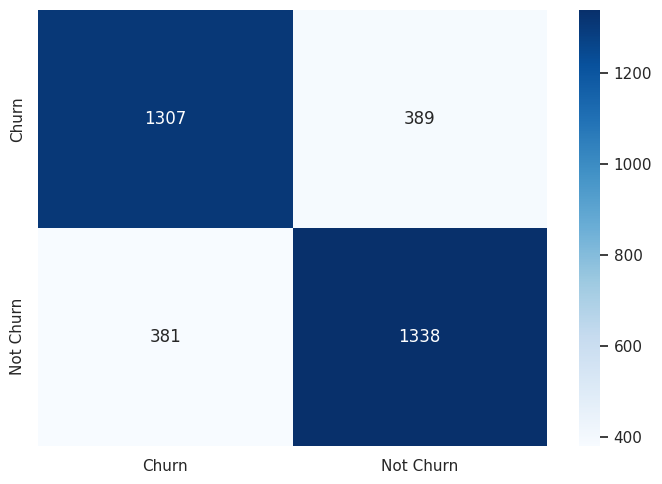

In [205]:
classes = ['Churn','Not Churn']

# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

print(f'Test score {accuracy_score(y_pred,y_test)}')

plot_confusionmatrix(y_pred,y_test,dom='Test')

In [206]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77      1688
         1.0       0.78      0.77      0.78      1727

    accuracy                           0.77      3415
   macro avg       0.77      0.77      0.77      3415
weighted avg       0.77      0.77      0.77      3415



In [207]:
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay

Test set accuracy: 0.77
Test set auc: 0.77


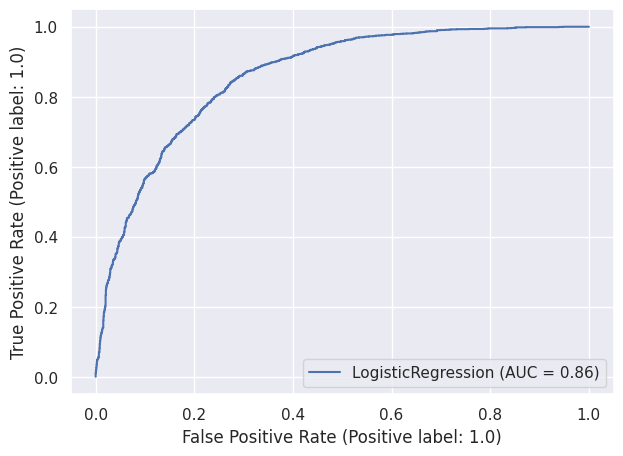

In [208]:
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = log_reg.predict(X_test) # Model's predictions

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
RocCurveDisplay.from_estimator(log_reg, X_test, y_test)


## Creating a model Pipline

In [219]:
dtree_pipeline = Pipeline([("scale",StandardScaler()), ("dtree", DecisionTreeClassifier(criterion="entropy"))])
rf_pipeline = Pipeline([("scale",StandardScaler()), ("random_forest", RandomForestClassifier(n_estimators=500,class_weight='balanced'))])
nb_pipeline = Pipeline([("scale",StandardScaler()), ("nb",GaussianNB())])
xgb_pipeline = Pipeline([("scale",StandardScaler()), ("nb",XGBClassifier())])

In [216]:
mypipeline = [dtree_pipeline, rf_pipeline, nb_pipeline, xgb_pipeline]

In [217]:
mypipeline

[Pipeline(steps=[('scale', StandardScaler()),
                 ('dtree', DecisionTreeClassifier(criterion='entropy'))]),
 Pipeline(steps=[('scale', StandardScaler()),
                 ('random_forest',
                  RandomForestClassifier(class_weight='balanced',
                                         n_estimators=500))]),
 Pipeline(steps=[('scale', StandardScaler()), ('nb', GaussianNB())]),
 Pipeline(steps=[('scale', StandardScaler()),
                 ('nb',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                                colsample_bytree=None,
                                early_stopping_rounds=None,
                                enable_categorical=False, eval_metric=None,
                                feature_types=None, gamma=None, gpu_id=None,
                                grow_policy=None, importance_type=None,
                               

In [218]:
num_folds = 10
results = []
names =[]
for name, model in mypipeline:
  kfold = KFold(n_splits=num_folds, shuffle=True)
  start = time.time()
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold)
  end = time.time()
  results.append(cv_results)
  names.append(name)
  print("%s: %f (%f) (runtime: %f)" % (name, cv_results.mean(), cv_results.std(),end-start))

StandardScaler(): 0.816530 (0.015429) (runtime: 0.515807)
StandardScaler(): 0.865282 (0.013145) (runtime: 37.395598)
StandardScaler(): 0.755950 (0.018859) (runtime: 0.064657)
StandardScaler(): 0.856196 (0.011200) (runtime: 11.394547)


<Axes: title={'center': 'Performance Comparision'}>

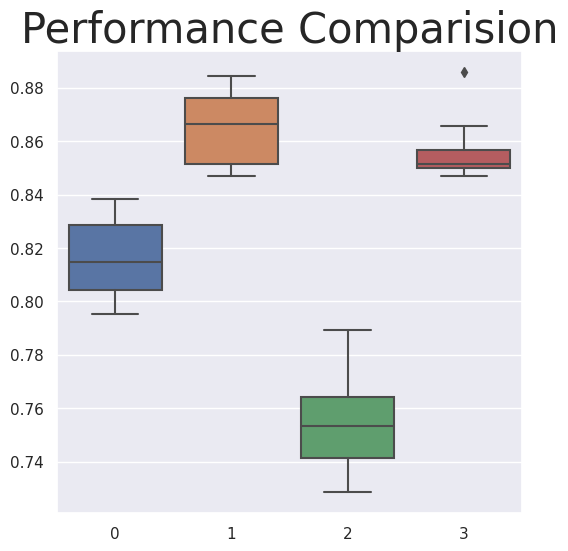

In [220]:
plt.figure(figsize=(6,6))
plt.title('Performance Comparision', fontsize=30)
sns.boxplot(data=results)

## Here we can see the performance comparision. As per our model implement we can say the random forest is the best model to our problem statement.



In [221]:
rfc = RandomForestClassifier(n_estimators = 10, criterion='entropy', random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [222]:
# Predict the Test set results
y_pred_rfc = rfc.predict(X_train)
y_pred_1 = rfc.predict(X_test)

Test score 0.8342606149341142
Test Confusion matrix
[[1307  389]
 [ 381 1338]]


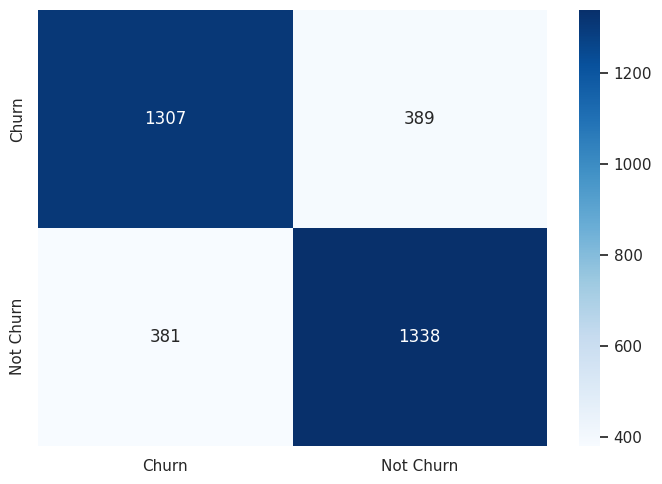

In [223]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    print(cf)
    sns.heatmap(cf,annot=True,yticklabels=classes
               ,xticklabels=classes,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()
print(f'Test score {accuracy_score(y_pred_1, y_test)}')
plot_confusionmatrix(y_pred,y_test,dom='Test')

In [226]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

         0.0       0.79      0.90      0.84      1688
         1.0       0.88      0.77      0.83      1727

    accuracy                           0.83      3415
   macro avg       0.84      0.83      0.83      3415
weighted avg       0.84      0.83      0.83      3415



Test set accuracy: 0.83
Test set auc: 0.83


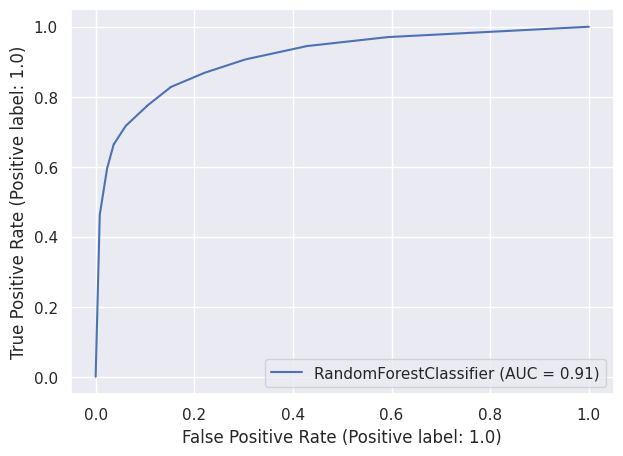

In [227]:
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
#y_pred1 = rfc.predict(X_test) # Model's predictions

# Compute test set accuracy
acc1 = accuracy_score(y_test, y_pred_1)
print(f"Test set accuracy: {acc1:.2f}")
acc2 = roc_auc_score(y_test, y_pred_1)
print("Test set auc: {:.2f}".format(acc2))
RocCurveDisplay.from_estimator(rfc, X_test, y_test)

## Here, we have build the Random Forest Classifier model with default parameter of n_estimators = 10

In [224]:
# view the feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

tenure                                     0.096290
MonthlyCharges                             0.092337
TotalCharges                               0.091500
Contract_Month-to-month                    0.059854
PaymentMethod_Electronic check             0.052078
OnlineSecurity_No                          0.051315
InternetService_Fiber optic                0.041678
Contract_Two year                          0.040886
TechSupport_No                             0.038163
OnlineBackup_No                            0.036308
OnlineSecurity_Yes                         0.033793
Contract_One year                          0.031482
Partner                                    0.030211
gender                                     0.027495
PaperlessBilling                           0.025568
Dependents                                 0.019364
SeniorCitizen                              0.017127
TechSupport_Yes                            0.016830
DeviceProtection_No                        0.016647
OnlineBackup

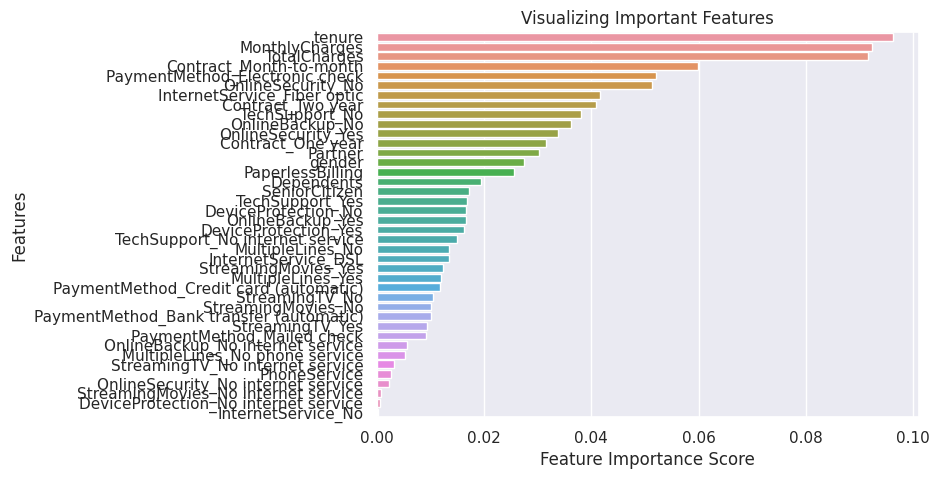

In [225]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

## After analysing the feature importance, the above showing visualization is the best suit for our model to get more score and working well.


## In our problem statement, they mentioned to use logistic regression. Logistic also a good model to implement the classification problem.